### Logistic Regression: Exercise
This is the sixth practical exercise of our course [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023).
In this exercise, we focus on creating a logistic regression model as outlined in the video. Make sure to watch it carefully before starting with this exercise.

---
\
Here is a reminder about the technical limitations on this programming platform **OpenJupyter**:

#### Inactivity and Saving

- After 15 minutes of inactivity, the Python kernel shuts down, but the kernel is easy to restart if you continue your work within 60 minutes.
- After 60 minutes of inactivity the data is deleted to free up resources for other users.
- Therefore, please save the notebook locally (click "File" -> "Download") if you are pausing your work on the notebook for more than one hour. (We have put a reminder to save the notebook after each task.)
- If you have to restore your work from a downloaded notebook, press the Upload Button and select your locally saved `.ipynb` file (confirm to overwrite).

#### Grading

- Solve the tasks in this notebook and use the next learning item in the course ("Solution sheet: Logistic Regression Quiz") to insert your questions.
- Till the due date (which is **the 27th of June (11:55 pm / 23:55 UTC**), you can revise your answers. Only after the deadline, we will publish the results of this assignment, **after this due date**, you can discuss your answers and approach in the forum.
---

In [1]:
# Run this cell first and only once
from Ex6_Grader import *
!python3 Ex6_Grader.pyc

# Importing packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,f1_score,recall_score


# Load the dataset into data


In [3]:
data = pd.read_csv('.LR_data.csv')

# Dataset overview and statistical summary


In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,patient_name
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,patient_name
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Data cleaning

Now its your turn ;)

In [7]:
# check for null values
null_counts = data.isnull().sum().sort_values(ascending=False)

# You might want to use this function too (.sort_values(ascending=False))
print(null_counts)

patient_name               569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

### Is there a column that needs to be removed?

In [8]:
# If yes, do it here
data = data.drop('patient_name', axis=1)

### Now check to see if the change actually happened.
Just do ```.info()``` or ```.head()``` again

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Now that we removed unnecessary columns (or did we?), the next clean up step is to take a look at our column names.

In [10]:
data.columns.sort_values()

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'diagnosis',
       'fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'id', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se',
       'texture_worst'],
      dtype='object')

### Renaming column names:

Some of the names include spaces, which isn't convenient for a data scientist. This is how you can rename some of the those columns

In [11]:
# correcting the column names
data.rename(columns={'concave points_mean':'concave_points_mean',
                     'concave points_se':'concave_points_se',
                     'concave points_worst':'concave_points_worst'} ,inplace=True)

### Again lets make sure our changes actually happened

This step is always made as a sanity check

In [12]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Lastly, we want to change our target column (diagnosis) to a numerical value

This step is important for our logistic model to work efficiently

In [13]:
# mapping target column data 'M' malignant to 1 and 'B' benign to 0
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

# Now that we have checked our data and cleaned it, its time for some deeper EDA to understand it more

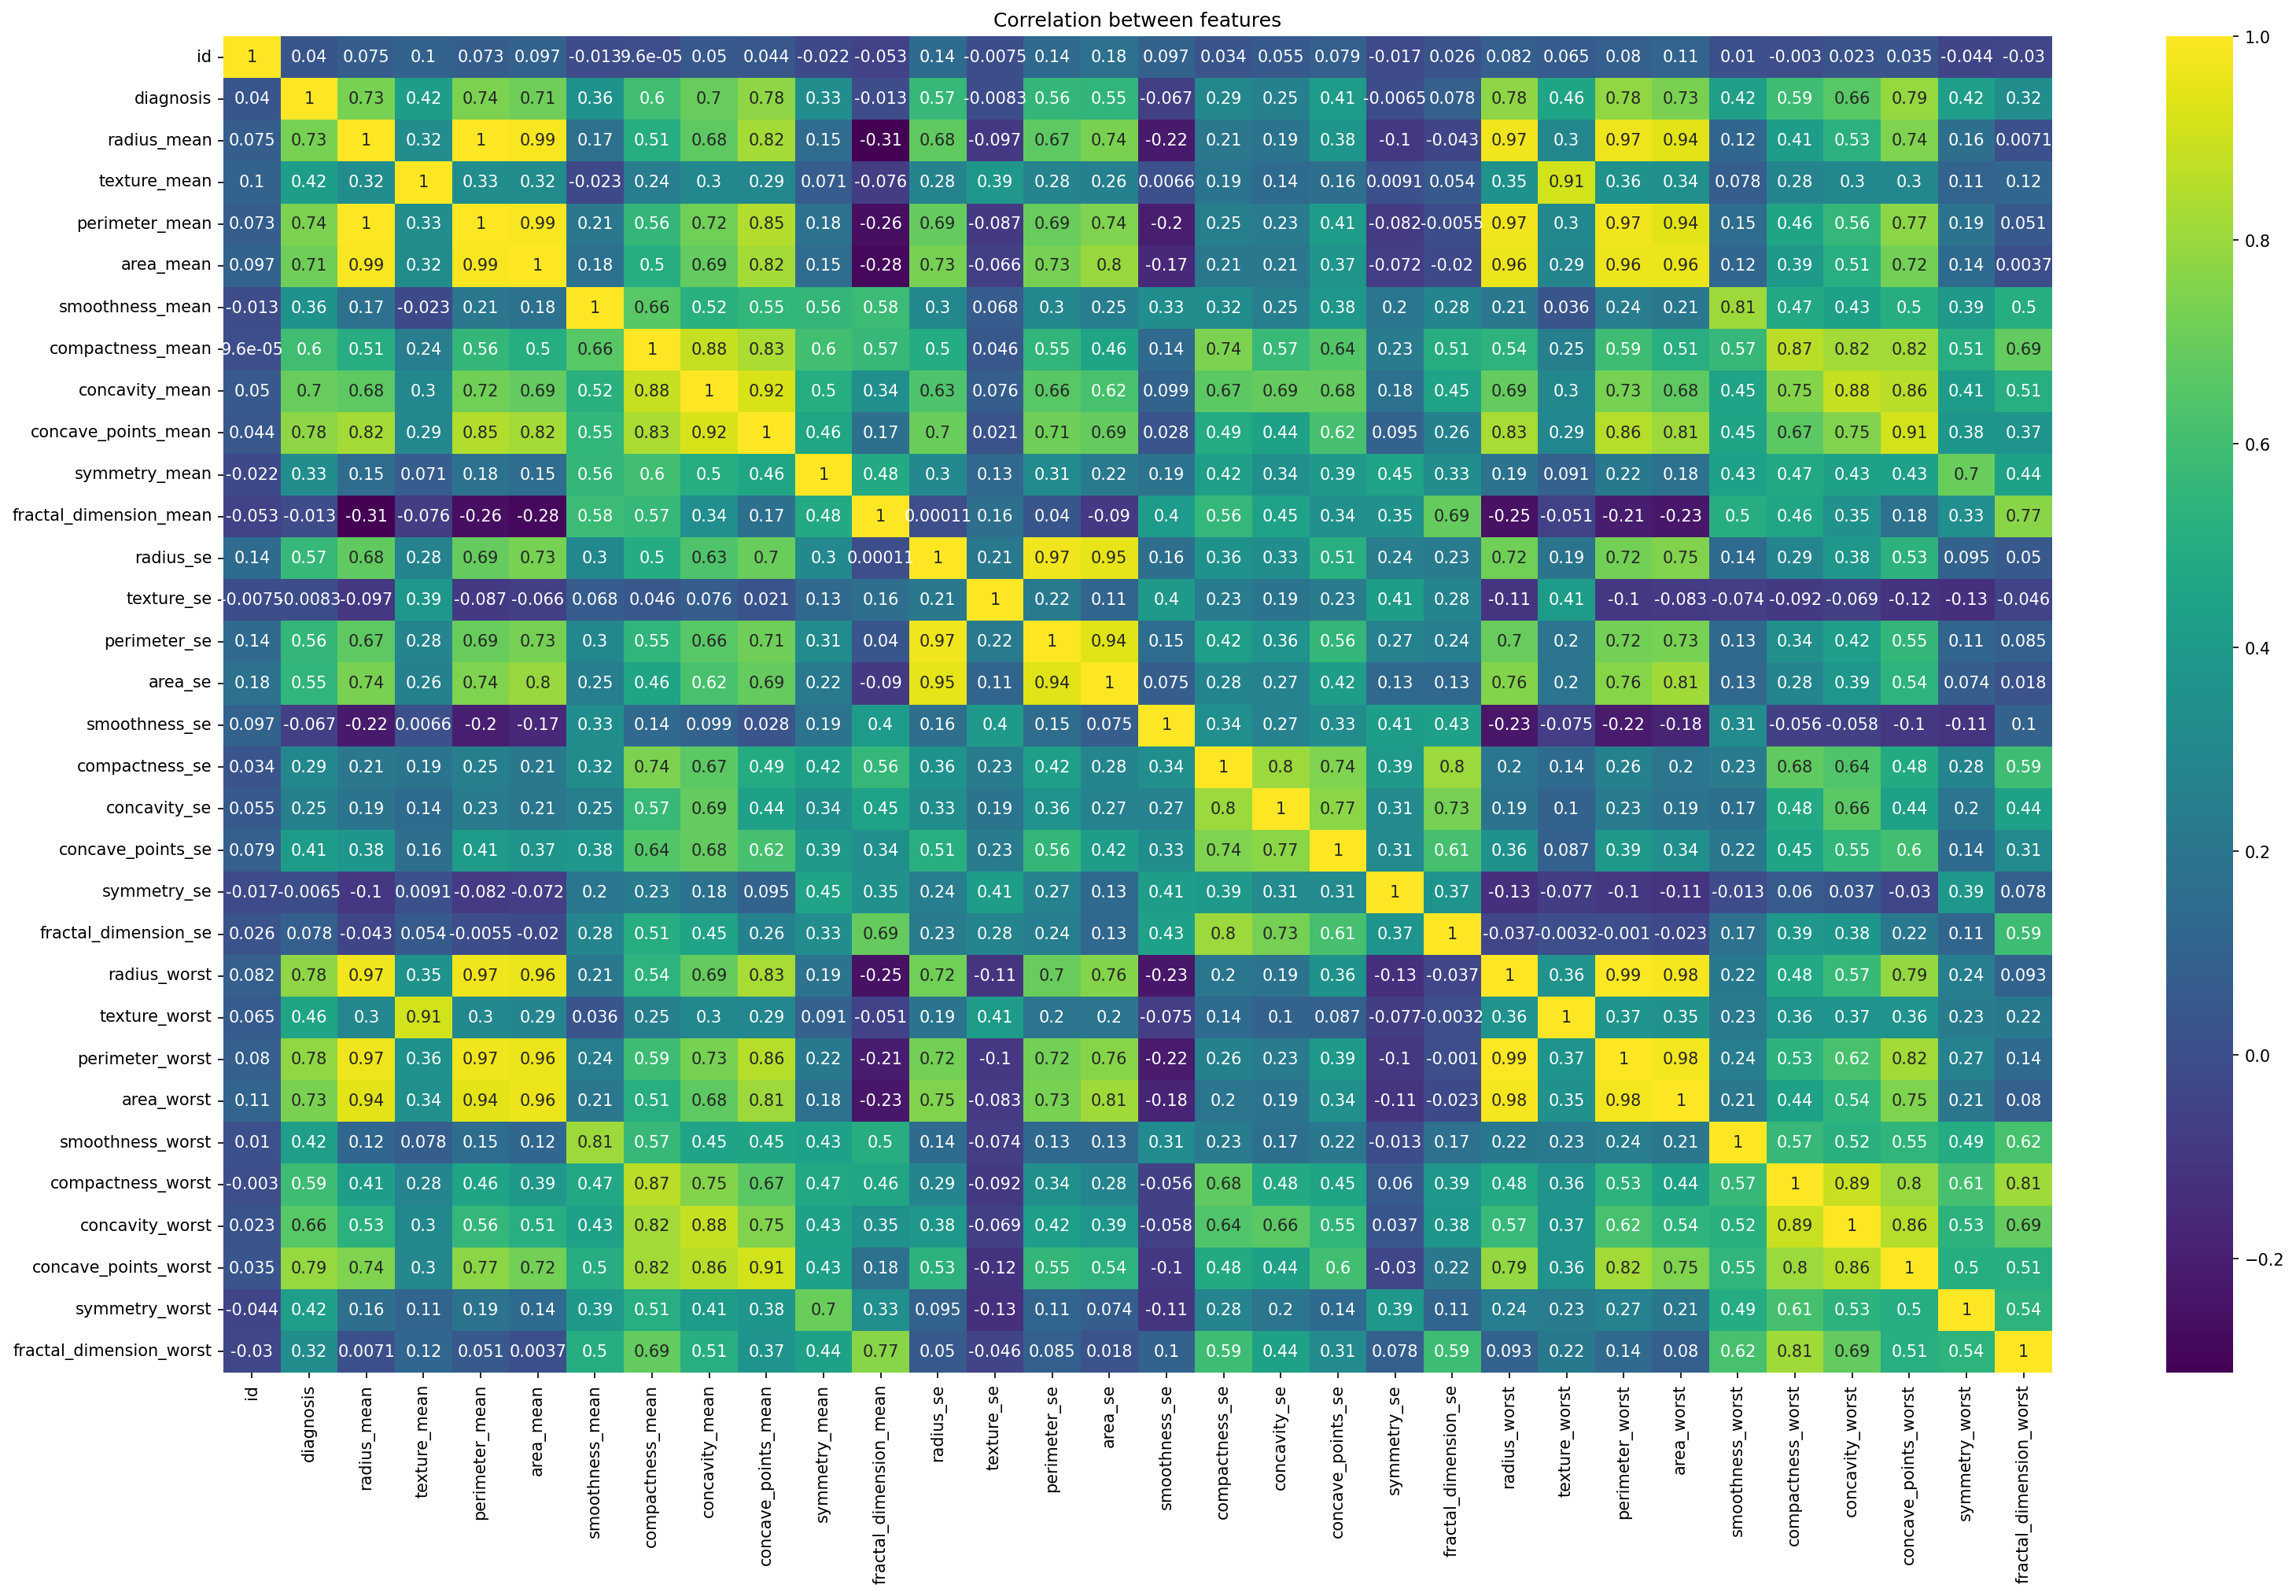

In [14]:
# Heatmap of the correlation of the features
plt.figure(figsize=(25,15),dpi=150)
sns.heatmap(data.corr(),cmap='viridis',annot=True)
plt.title('Correlation between features');

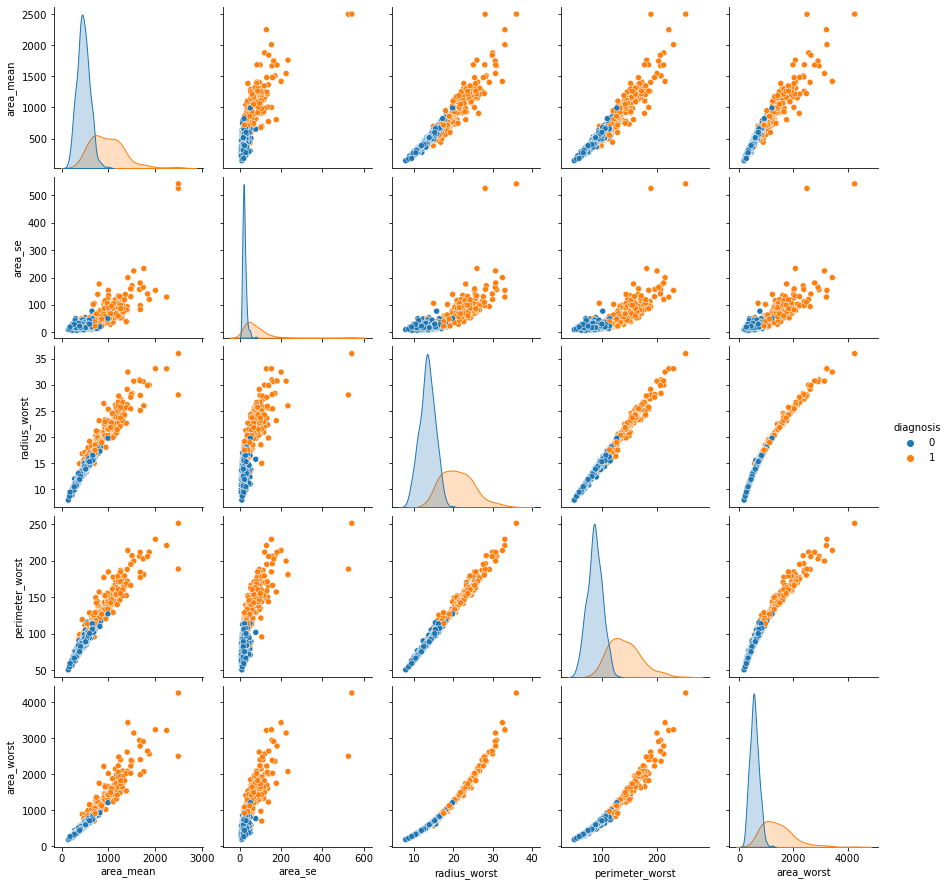

In [15]:
# understanding the relations between variables
sns.pairplot(data[['area_mean','area_se','radius_worst','perimeter_worst','area_worst','diagnosis']],
             hue='diagnosis');

# Now, Lets create our Logistic regression Model

In [16]:
# Create X,y from your dataset. Take all features for X except 'diagnosis' which will be for y

X = data.drop('diagnosis', axis=1)
y =  data['diagnosis']

In [17]:
# Do the split with 75% train and 25% test. replace the string with the actual input
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y ,
                                                    test_size=0.25,
                                                    stratify=y,  # Leave this unchanged (Feel free to search what it does)
                                                    random_state=42) # Leave this unchanged


In this step we will do some [standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Feel free to skip this step and see the impact with and without it :)

if you already ran the cell but want to see the impact without it, make sure to restart the kernel and run all cells except this one

In [18]:
# Now lets scale our data and standardize it

# using standard scaler to scale the data
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Creating a Logistic Regression Model using default settings and not using liblinear

In [19]:
# Create an instance of your model here
lr_model = LogisticRegression()

# Now fit your model on your training data (the scaled version or not is up to you)
lr_model.fit(X_train, y_train)

LogisticRegression()

# Congrats! You just trained your first Logistic Regression model in this course

But is it any good though? Time to see the score on your testing data

### Now use your model to predict on the X_test values

In [20]:
y_pred = lr_model.predict(X_test)

In [21]:
# use the .score function to see the accuracy of your model on the testing data
lr_model.score(X_test, y_test)

0.6293706293706294

## If you ran everything before this point and are satisfied with the result, lets see the overall performance of your model on the test data

In [22]:
# Run this cell when you are ready
# The reason behind using the F1_score and Precision and Recall, will be asked in the final exam
# so make sure you search what is their purpose :)

scores = {'Accuracy':round(accuracy_score(y_test,y_pred),3),
          'F1_score':round(f1_score(y_test,y_pred),3),
          'Recall':round(recall_score(y_test,y_pred),3),
          'Precision':round(precision_score(y_test,y_pred),3)}

print(scores)

{'Accuracy': 0.629, 'F1_score': 0.0, 'Recall': 0.0, 'Precision': 0.0}


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(confusion_matrix(y_test,y_pred))

[[90  0]
 [53  0]]


## Finally to get a nice report printed out, sklearn has the ```classification_report``` function that comes in handy

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        90
           1       0.00      0.00      0.00        53

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Draft Cells